# Echantillonnage d’importance adaptatif en Population Monte-Carlo

## 1. Echantillonnage d’importance et optimalité au sens de la variance asymptotique

### T1 #TODO
### T2 #TODO
### T3 #TODO

### S1

On prend pour $\Pi$ la loi uniforme sur [0,1] et on pose $h(x)=x$. Nous allons d'abord illustrer graphiquement en fonction de $n,$ I'approximation de $\Pi(h)$ par $\tilde{\Pi}_{g, n}(h)$ où on a posé $g=\pi .$ Pour cela, tirer $m=2000$ variables aléatoires $\left(X_{i}\right)_{1 \leq i \leq m}$ iid suivant une loi uniforme et tracer les valeurs prises par $\tilde{\Pi}_{g, n}(h)$ pour $n=1,2, \ldots, m$ On pourra aussi représenter les bornes inférieures et supérieures d'un intervalle de confiance à $95 \%$ de $\Pi(h)$ pour ces mêmes valeurs de $n$.

Ce rapport contient uniquement le code pour la visualisation. Vous trouverez l'implémentation de tous les algorithmes dans `spellbook.py`.

Ici, nous utilisons l'intervalle de confiance t, car on suppose que pour les grands n la distribution de $\tilde{\Pi}_{g, n}(h)$ est normale.

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()
%matplotlib inline

SEED = 666

In [98]:
from scipy.stats import t
def visualize_simple_simulation(estimated_values, estimated, title, ylim):
    intervals = np.array([t.interval(0.95, n - 1, estimated[:n].mean(), estimated[:n].std()/n**0.5) for n in range(1, M+1)])
    plt.figure(figsize=(20, 10))
    plt.plot(estimated_values, label=r"$\tilde{\Pi}_{g, n}(h)$")
    plt.ylabel(r"$\tilde{\Pi}_{g, n}(h)$", size=16)
    plt.xlabel(r"$n$", size=16)
    plt.fill_between(np.arange(0, 2000, 1), intervals[:, 0], intervals[:, 1], color='green', alpha=.5, label=r"95% t-confint")
    plt.ylim(*ylim)
    plt.title(title, size=16)
    plt.legend(fontsize=16)
    plt.show()

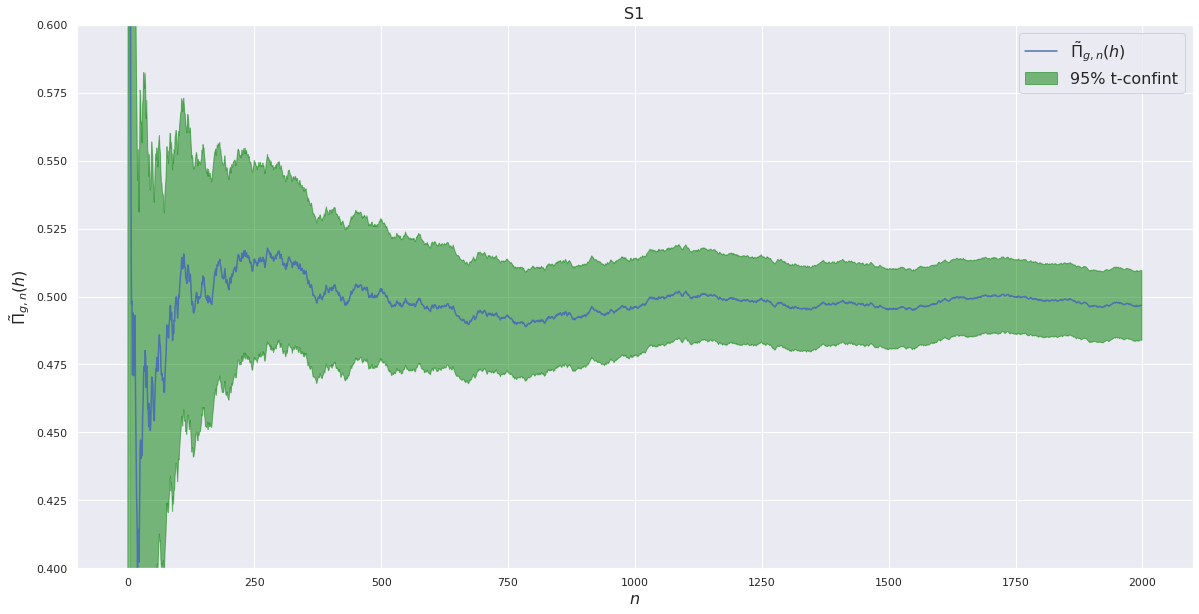

In [99]:
from spellbook import uniform_0_1, run_simple_simulation
np.random.seed(SEED)

def h(x):
    return x

M = 2000

estimated_values, estimated = run_simple_simulation(h, uniform_0_1, uniform_0_1, M)
visualize_simple_simulation(estimated_values, estimated, "S1", (0.4, 0.6))

Nous pouvons voir que notre estimateur approche la vraie valeur 0.5. L'intervalle de confiance diminue à chaque fois.

### S2

Reprendre la question précédente, en remplaçant la densité $g$ par $g:[0,1] \mapsto \mathbb{R}^{+}$ telle que $g(x)=\frac{5}{2} x^{3 / 2}$ pour $x \in[0,1] .$ Pour simuler une variable aléatoire $X$ suivant cette densité $g,$ on pourra utiliser (en la justifiant) la méthode suivante: tirer une variable aléatoire $U$ suivant une loi uniforme sur [0,1] et poser $X=U^{2 / 5}$. Vérifier expérimentalement qu'il vaut mieux utiliser la densité instrumentale définie sur [0,1] par $g(x)=\frac{5}{2} x^{3 / 2}$ plutôt que la densité instrumentale uniforme: $g(x)=1$ pour $x \in[0,1]$.

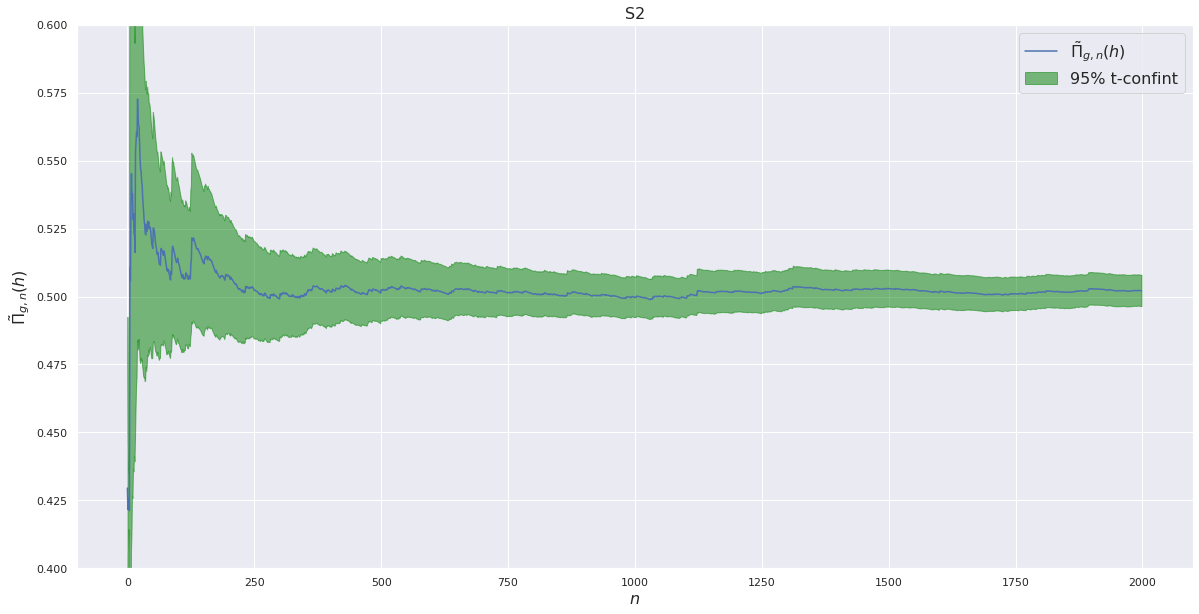

In [100]:
from spellbook import Distribution, g_polynomial
np.random.seed(SEED)

M = 2000

estimated_values, estimated = run_simple_simulation(h, g_polynomial, uniform_0_1, M)
visualize_simple_simulation(estimated_values, estimated, "S2", (0.4, 0.6))

Dans ce cas la convergence est beaucoup plus rapide, la taille limite de l'intervalle de confiance est moindre. Cela montre que la densité $g(x)=\frac{5}{2} x^{3 / 2}$ est plus appropriée pour estimation.

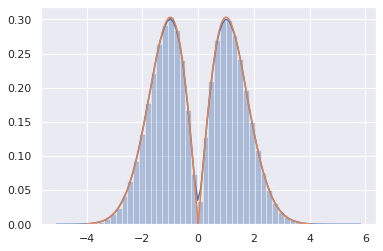

In [4]:
# S3 sampling from g_tilde
from spellbook import g_tilde
np.random.seed(SEED)

x = np.linspace(-4, 4, 10000)
sns.distplot(g_tilde.sample(1000000))
plt.plot(x, g_tilde.pdf(x))
plt.show()

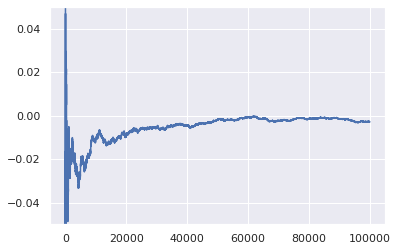

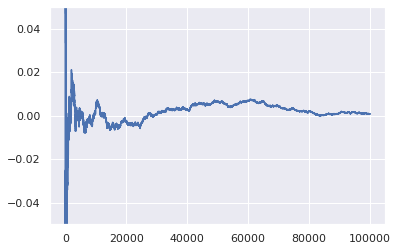

In [5]:
# S3 g_tilde simulation
from spellbook import normal_standard
np.random.seed(SEED)

M = 100000

estimated_values_g_tilde, estimated_tilde  = run_simple_simulation(h, g_tilde, normal_standard, M)
plt.plot(estimated_values_g_tilde)
plt.ylim(-0.05, 0.05)
plt.show()

# S3 normal_standard simulation

M = 100000

estimated_values_normal_standard, estimated_normal = run_simple_simulation(h, normal_standard, normal_standard, M)
plt.plot(estimated_values_normal_standard)
plt.ylim(-0.05, 0.05)
plt.show()

In [6]:
# S3 check inequality
np.random.seed(SEED)

est_tilde = []
est_norm = []

M = 100

for i in range(10000):
    est_tilde.append(run_simple_simulation(h, g_tilde, normal_standard, M)[0][-1]*M**0.5)
    est_norm.append(run_simple_simulation(h, normal_standard, normal_standard, M)[0][-1]*M**0.5)

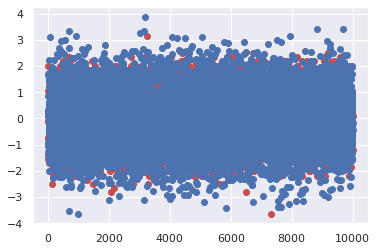

In [7]:
plt.plot(est_tilde, "ro")
plt.plot(est_norm, "bo")

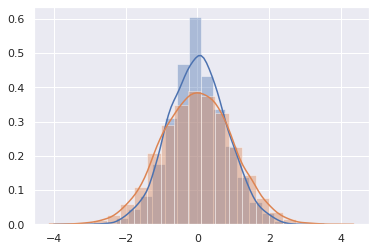

In [8]:
sns.distplot(est_tilde, bins=20)
sns.distplot(est_norm, bins=20)
plt.show()

In [9]:
print(np.array(est_tilde).var(), np.array(est_norm).var())

0.6473688119286807 1.0003134790472354


In [10]:
print(estimated_normal.var(), estimated_tilde.var())

0.9961142087693273 0.6366377865777144


In [11]:
# S4
from spellbook import laplace, AdaptiveSampling
np.random.seed(SEED)

advs = AdaptiveSampling(h, [normal_standard, g_tilde, laplace], normal_standard)
history = advs.fit()

Algorithm converged on iteration 77


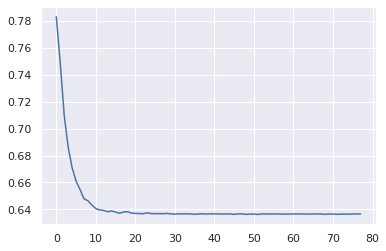

In [12]:
plt.plot(history["variance_log"])

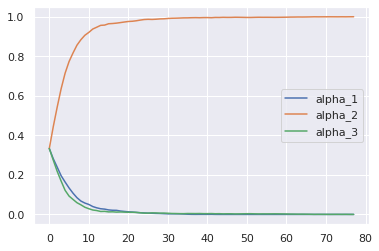

In [13]:
plt.plot(np.vstack(history["alphas_log"])[:, 0], label="alpha_1")
plt.plot(np.vstack(history["alphas_log"])[:, 1], label="alpha_2")
plt.plot(np.vstack(history["alphas_log"])[:, 2], label="alpha_3")
plt.legend()
plt.show()

In [14]:
# S5
from spellbook import g_hyperbolic
np.random.seed(SEED)

advs = AdaptiveSampling(h, [g_polynomial, g_hyperbolic, uniform_0_1], uniform_0_1)
history = advs.fit(tolerance=1e-4)

Algorithm converged on iteration 121


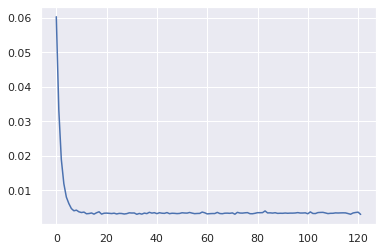

In [15]:
plt.plot(history["variance_log"])

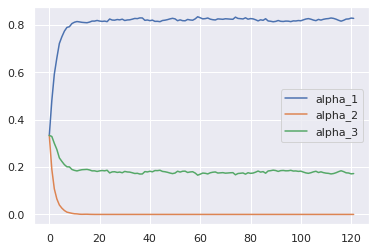

In [16]:
plt.plot(np.vstack(history["alphas_log"])[:, 0], label="alpha_1")
plt.plot(np.vstack(history["alphas_log"])[:, 1], label="alpha_2")
plt.plot(np.vstack(history["alphas_log"])[:, 2], label="alpha_3")
plt.legend()
plt.show()

In [17]:
advs.alphas

array([0.82743351, 0.        , 0.17256649])

In [18]:
# S6
np.random.seed(SEED)

advs = AdaptiveSampling(h, [g_polynomial, g_hyperbolic, uniform_0_1], uniform_0_1)
history = advs.fit(max_iter=20, debug=True)

Maximal iteration (20) is reached


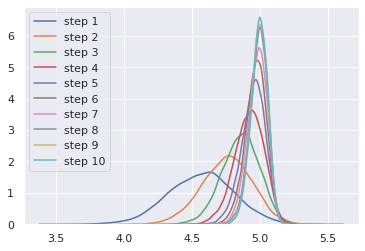

In [19]:
for i in range(10):
    sns.distplot(history["global_estimation_log"][i], label=f"step {i+1}", hist=False)
plt.legend()
plt.show()

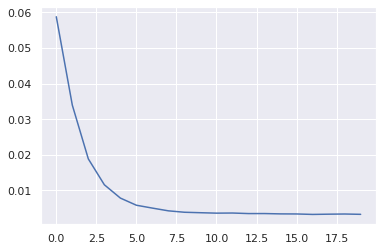

In [20]:
plt.plot([history["global_estimation_log"][i].var() for i in range(20)])